# ArUco, ChArUco boards for calibration

We have seen ArUco markers and how they can be used to mark a scene for augmented reality. We will now see how we can create ArUco and ChArUco boards for camera calibration.

## ArUco boards

An ArUco board is a set of markers that acts like a single marker in the sense that it provides a single pose for the camera. This is because the distance between the markers is known and they are oriented in the same way.

THis means that finding the pose of one marker in the board describes the pose of the whole board. Thus also means that the oise can be estimated even if some parts of the board may be occluded.

### Creating Boards

Since an ArUco board is essentially a group of markers in a grid like function, OpenCV provides us with a convenience function to create ArUco boards, `aruco.GridBoard`.

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['image.cmap'] = 'gray'

In [17]:
dictionary = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250)
# marker length = 3 inches
# marker spacing = 0.25 inches

gridboard = cv2.aruco.GridBoard((6, 8), 0.0762, 0.0067, dictionary)

Since gridboard inherits from `Board`, we can use the `generateImage` method to generate the board.

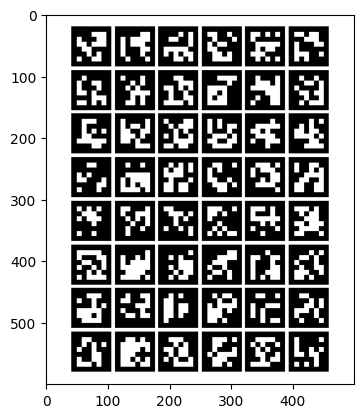

In [30]:
aruco_board_1 = gridboard.generateImage((500, 600), None, 20)
plt.imshow(aruco_board_1)

We can then save this board, print it and use it for camera calibration.

### Detecting Boards

Board detection is similar to individual amrker detection using `aruco.detectMarkers`.

### Pose Estimation

For ArUco and ChArUco boards and individual markers, the pose can be estimated using the `SolvePnP` method. For the boards, as opposed to imndividual markers, the method `aruco.Board.matchImagePoints` should be used. It takes in a board configuration, a set of detected markers and fills in the image points and object points.

## ChArUco Boards
Unlike ArUco boards which are made of markers, ChArUco boards are made of markers within balck square grids. We can access them from the `aruco.CharucoBoard` class.

The benefits of ChArUco boards is that they provide both, ArUco markers versatility and chessboard corner precision, which is important for calibration and pose estimation

### Drawing Boards

In [31]:
charuco_board = cv2.aruco.CharucoBoard((6, 8), 0.0889, 0.0762, dictionary)

We can now generate the board.

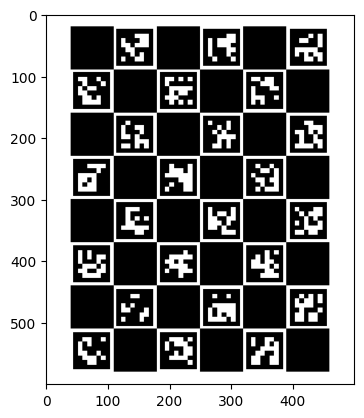

In [32]:
charuco_marker = charuco_board.generateImage((500, 600), None, 20)
plt.imshow(charuco_marker)

In [36]:
np.squeeze(charuco_board.getChessboardSize())

array([6, 8])

In [49]:
np.squeeze(charuco_board.getObjPoints()[0]) * 39.3700787

array([[3.7499998 , 0.24999999, 0.        ],
       [6.7499995 , 0.24999999, 0.        ],
       [6.7499995 , 3.2500002 , 0.        ],
       [3.7499998 , 3.2500002 , 0.        ]], dtype=float32)

## Generating Boards to Print

### Markers

In [53]:
ids = [2, 3, 5, 7]

img_ids = []

for id in ids:
    img_ids.append(cv2.aruco.generateImageMarker(dictionary, id, 500, borderBits=2))

In [56]:
extension = '.png'
marker_names = ['aruco_marker_1', 'aruco_marker_2', 'aruco_marker_3', 'aruco_marker_4']

for name, img in zip(marker_names, img_ids):
    cv2.imwrite('aruco_images/'+name+extension, img)

### Aruco and Charuco board

In [57]:
aruco_board_name = 'aruco_board'
cv2.imwrite('aruco_images/'+aruco_board_name+extension, aruco_board_1)

charuco_board_name = 'charuco_board'
cv2.imwrite('aruco_images/'+charuco_board_name+extension, charuco_marker)

True

### Aruco diamond

In [64]:
aruco_diamond_ids = [10, 11, 2, 13]

aruco_diamond_board = cv2.aruco.CharucoBoard((3, 3), 0.0889, 0.06985, dictionary, np.int32(aruco_diamond_ids))
aruco_diamond = aruco_diamond_board.generateImage((500, 500), None, 15, 2)

In [65]:
aruco_diamond_name = 'aruco_diamond'
cv2.imwrite('aruco_images/'+aruco_diamond_name+extension, aruco_diamond)

True